In [162]:
import openpyxl
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

import statsmodels.api as sm

import itertools
import optuna

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')

In [163]:
sm.tools.print_version.show_versions(show_dirs=True)
rcParams['figure.figsize'] = 12, 10


INSTALLED VERSIONS
------------------
Python: 3.7.2.final.0

statsmodels

Installed: 0.13.5 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\statsmodels)

Required Dependencies

cython: 0.29.6 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\Cython)
numpy: 1.21.6 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\numpy)
scipy: 1.7.3 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\scipy)
pandas: 1.3.5 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\pandas)
    dateutil: 2.8.0 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\dateutil)
patsy: 0.5.6 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\patsy)

Optional Dependencies

matplotlib: 3.0.3 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\matplotlib)
    backend: module://ipykernel.pylab.backend_inline 
cvxopt: Not installed
joblib: 0.13.2 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\joblib)

Developer Tools

IPython: 7.3.0 (C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\IPython)
    jinja2: 2.10 (C

In [164]:
wb1 = openpyxl.load_workbook(r"data_sheets\Книга1.xlsx")
sheet = wb1['Лист4']

In [165]:
def df_test(frame_col):
    print('Результат теста:')
    df_result = adfuller(frame_col)
    df_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for result_value, label in zip(df_result, df_labels):
        print(label + ' : ' + str(result_value))

    if df_result[1] <= 0.05:
        print("Сильные доказательства против нулевой гипотезы, ряд является стационарным.")
        return True
    else:
        print("Слабые доказательства против нулевой гипотезы, ряд не является стационарным.")
        return False

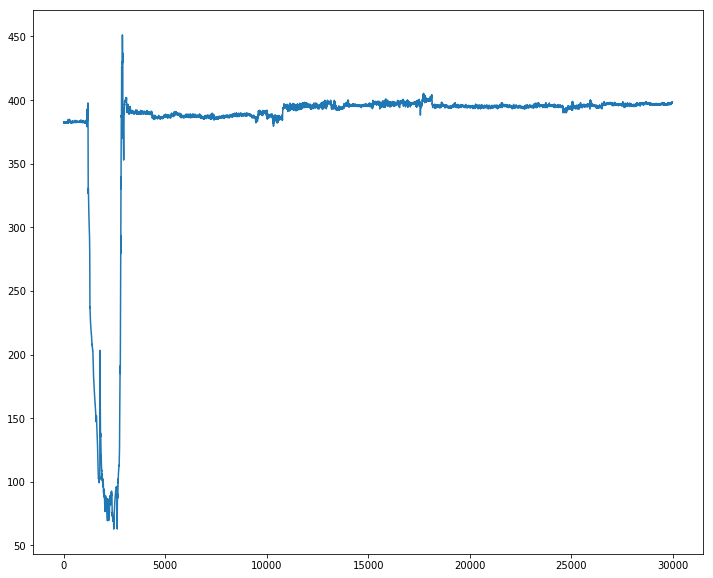

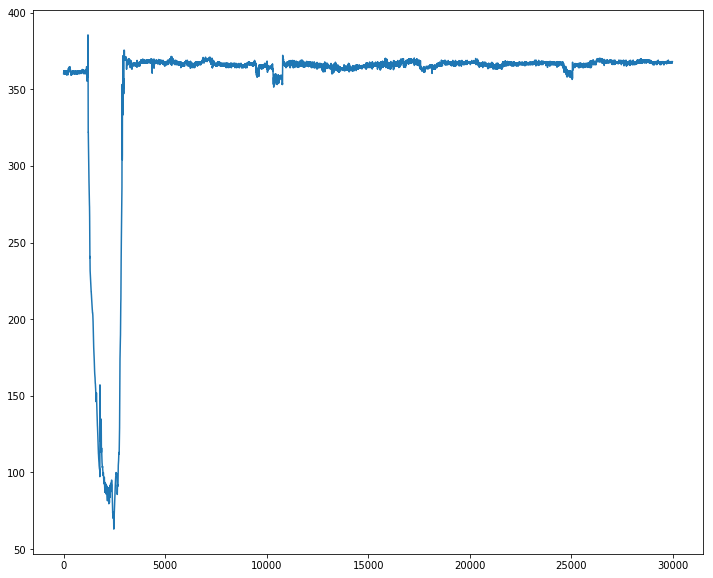

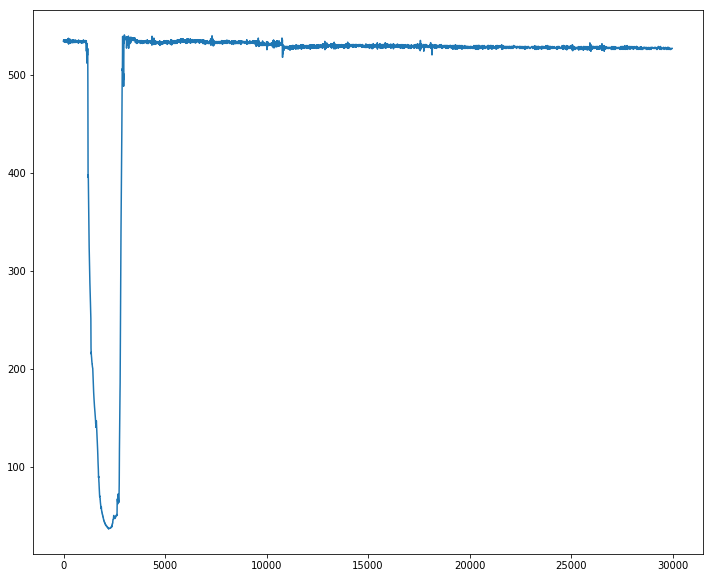

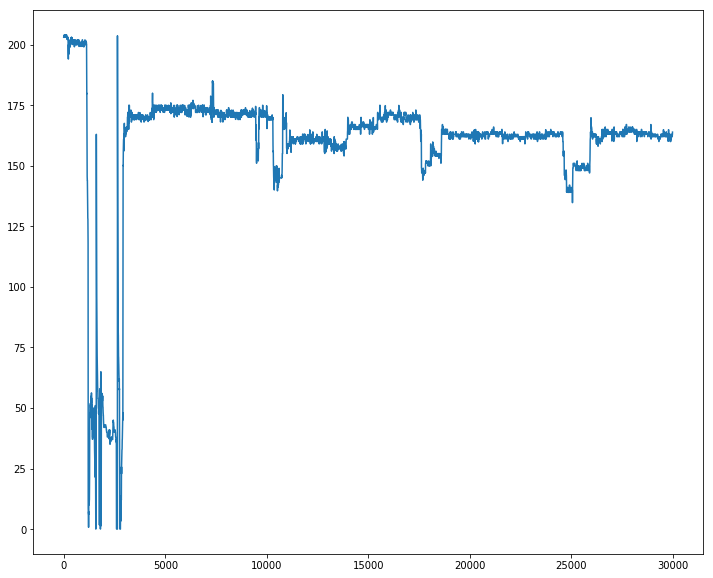

In [166]:
start = datetime.datetime.now()
timer_train = []
timer_test = []
batch_train = []
batch_train_1 = []
batch_train_2 = []
batch_train_3 = []
batch_train_4 = []
batch_train_5 = []
batch_train_6 = []
batch_train_7 = []
batch_test = []
n = 18
border = 30000
num = 30530
for i in range (0, border-n):
    timer_train.append(pd.to_datetime((sheet.cell(row = i+n, column = 8).value)))
    batch_train.append(float(sheet.cell(row = i+n, column = 1).value))
    batch_train_1.append(float(sheet.cell(row = i+n, column = 2).value))
    batch_train_2.append(float(sheet.cell(row = i+n, column = 5).value))
    batch_train_3.append(float(sheet.cell(row = i+n, column = 6).value))
    batch_train_4.append(float(sheet.cell(row = i+n, column = 4).value))
    batch_train_5.append(float(sheet.cell(row = i+n, column = 3).value))
    batch_train_6.append(float(sheet.cell(row = i+n, column = 7).value))
    batch_train_7.append(float(sheet.cell(row = i+n, column = 9).value))
for j in range (border-n, num-n):
    timer_test.append(pd.to_datetime((sheet.cell(row = i+n, column = 2).value)))
    batch_test.append(float(sheet.cell(row = j+n, column = 2).value))

plt.plot(batch_train)
plt.show()
plt.plot(batch_train_1)
plt.show()
plt.plot(batch_train_2)
plt.show()
plt.plot(batch_train_6)
plt.show()


Результат теста:
ADF Test Statistic : -3.093734560905504
p-value : 0.02702034700266399
#Lags Used : 49
Number of Observations Used : 29932
Сильные доказательства против нулевой гипотезы, ряд является стационарным.
Результат теста:
ADF Test Statistic : -2.496047005408416
p-value : 0.11643909605296027
#Lags Used : 47
Number of Observations Used : 29934
Слабые доказательства против нулевой гипотезы, ряд не является стационарным.
Результат теста:
ADF Test Statistic : -2.906840711165638
p-value : 0.04455827914485089
#Lags Used : 45
Number of Observations Used : 29936
Сильные доказательства против нулевой гипотезы, ряд является стационарным.
Результат теста:
ADF Test Statistic : -2.9729898616655417
p-value : 0.037494961087999094
#Lags Used : 50
Number of Observations Used : 29931
Сильные доказательства против нулевой гипотезы, ряд является стационарным.
Результат теста:
ADF Test Statistic : -2.8970090643804305
p-value : 0.045696909716795624
#Lags Used : 47
Number of Observations Used : 29934

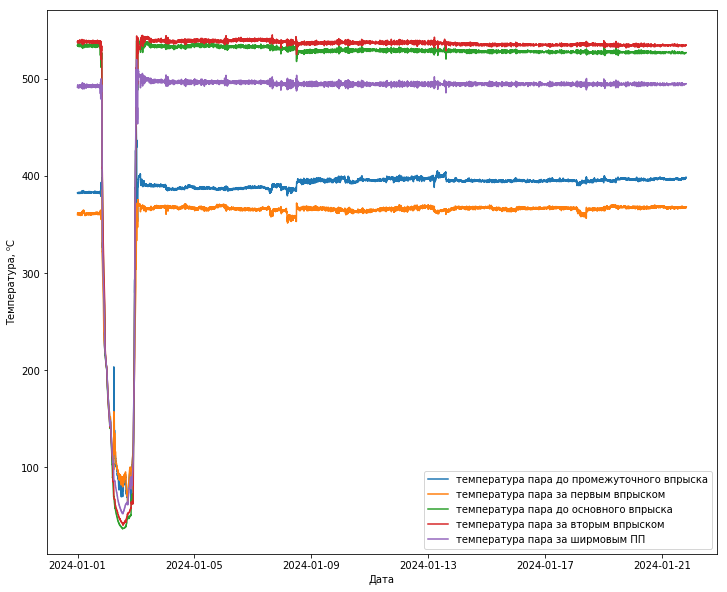

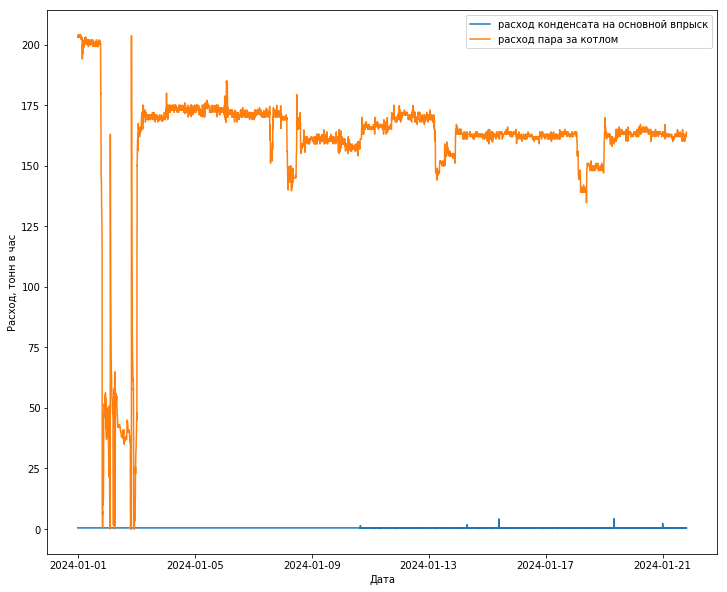

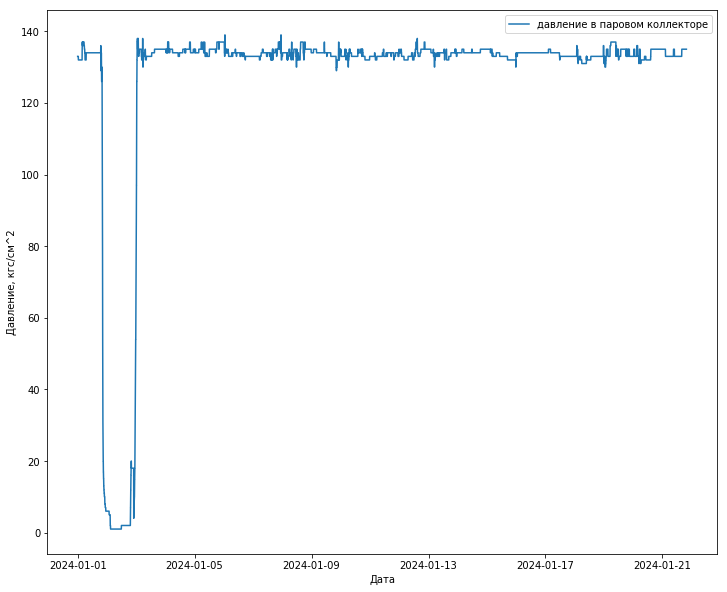

In [167]:
df1 =  pd.DataFrame(columns = ["temp1", "temp2", "temp3", "temp4","temp5", "flow1", "flow2", "pres1"])
df1.temp1 = batch_train
df1.temp2 = batch_train_1
df1.temp3 = batch_train_2
df1.temp4 = batch_train_3
df1.temp5 = batch_train_4
df1.flow1 = batch_train_5
df1.flow2 = batch_train_6
df1.pres1 = batch_train_7

df_test(df1['temp1'])
df_test(df1['temp2'])
df_test(df1['temp3'])
df_test(df1['temp4'])
df_test(df1['temp5'])
df_test(df1['flow1'])
df_test(df1['flow2'])
df_test(df1['pres1'])

df1.index = pd.date_range(start='2024-01-01 00:00:00', periods = len(df1['temp1']), freq='min')
df1_diff = df1.diff().dropna()
df1_diff.index = pd.date_range(start='2024-01-01 00:00:00', periods = len(df1_diff['temp1']), freq='min')

fig, ax = plt.subplots()
ax.set_ylabel('Температура, ⁰C')
ax.set_xlabel ('Дата')
ax.plot(df1['temp1'], label = "температура пара до промежуточного впрыска")
ax.plot(df1['temp2'], label = "температура пара за первым впрыском")
ax.plot(df1['temp3'], label = "температура пара до основного впрыска")
ax.plot(df1['temp4'], label = "температура пара за вторым впрыском")
ax.plot(df1['temp5'], label = "температура пара за ширмовым ПП")
ax.legend()

fig, ap = plt.subplots()
ap.set_ylabel('Расход, тонн в час')
ap.set_xlabel ('Дата')
ap.plot(df1['flow1'], label = "pасход конденсата на основной впрыск")
ap.plot(df1['flow2'], label = "pасход пара за котлом")
ap.legend()

fig, af = plt.subplots()
af.set_ylabel('Давление, кгс/см^2')
af.set_xlabel ('Дата')
af.plot(df1['pres1'], label = "давление в паровом коллекторе")
af.legend()

Результат теста:
ADF Test Statistic : -5.172180386756116
p-value : 1.0017735459681954e-05
#Lags Used : 8
Number of Observations Used : 521
Сильные доказательства против нулевой гипотезы, ряд является стационарным.


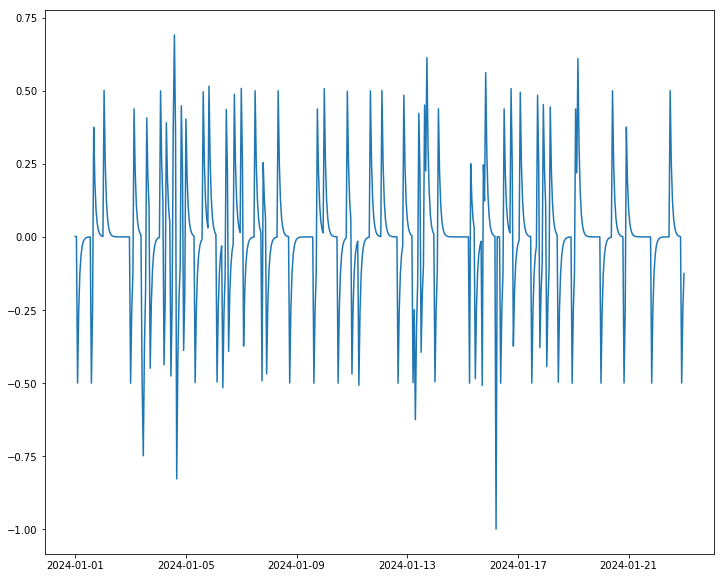

In [168]:
df2 =  pd.DataFrame(columns = ["temp1"])
df2.flow1 = batch_test
df2_diff = df2.diff().dropna()
while((df_test(df2['flow1']) != True) and (i in range (1, 10))):
    df2_diff = df2_diff.diff().dropna()
df2.index = pd.date_range(start='2024-01-01 00:00:00', periods = len(df2['flow1']), freq='h')
df2_diff.index = pd.date_range(start='2024-01-01 00:00:00', periods = len(df2_diff['flow1']), freq='h')
plt.plot(df2_diff['flow1'])

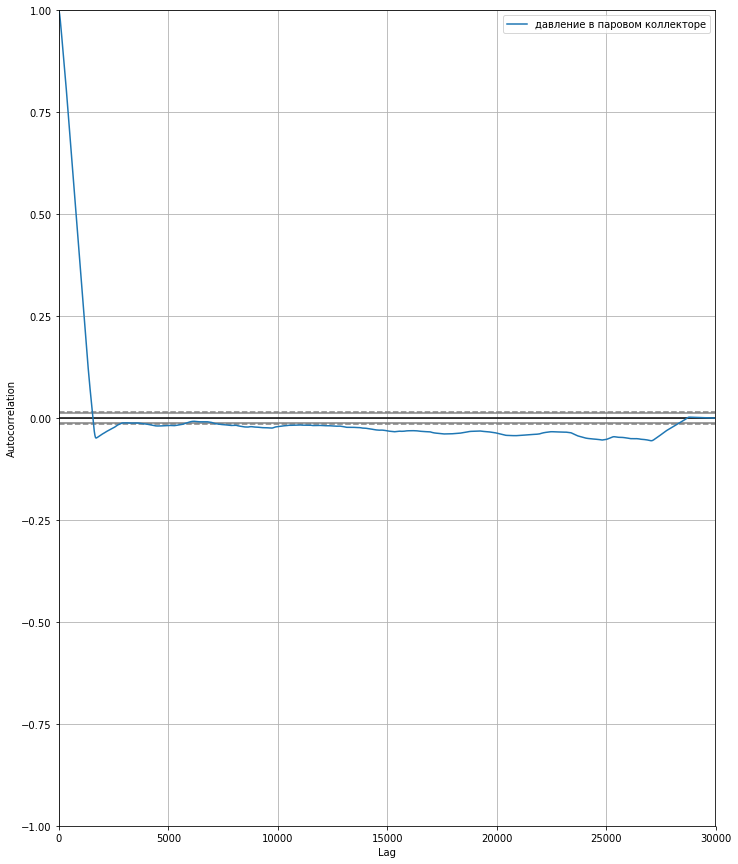

In [169]:
rcParams['figure.figsize'] = 40, 15
figure = pylab.subplot(1,3,3)
figure1 = pd.plotting.autocorrelation_plot(df1['pres1'], label = "давление в паровом коллекторе")
pylab.legend()
rcParams['figure.figsize'] = 12, 10

In [194]:
df_dc = pd.DataFrame(columns = ["value"])
values = []
for i in range(0, len(df1['pres1'])):
    if (i % 60 == 0):
        values.append(df1.temp1[i])
df_dc.value = values
df_dc.index = pd.date_range(start='2024-01-01 00:00:00', periods = len(df_dc.value), freq='h')
#print(df_dc['value'])
decompose = seasonal_decompose(df_dc)
print(decompose.trend)
plt.show()

2024-01-01 00:00:00   NaN
2024-01-01 01:00:00   NaN
2024-01-01 02:00:00   NaN
2024-01-01 03:00:00   NaN
2024-01-01 04:00:00   NaN
                       ..
2024-01-21 15:00:00   NaN
2024-01-21 16:00:00   NaN
2024-01-21 17:00:00   NaN
2024-01-21 18:00:00   NaN
2024-01-21 19:00:00   NaN
Freq: H, Name: trend, Length: 500, dtype: float64


In [195]:
model_dynamic = sm.tsa.DynamicFactorMQ(df1["temp1"], 
    k_factors = 2,
    error_cov_type = "unstructured",
    error_order = 2,
    error_var = True
).fit(disp = False)

In [196]:
prog_start = 0
predictions1 = model_dynamic.get_prediction(start = 0, end = len(df2['flow1']), dynamic = False)
forecast_values1 = predictions1.predicted_mean

In [197]:
print(forecast_values1)

2024-01-01 00:00:00    382.468781
2024-01-01 00:01:00    382.468651
2024-01-01 00:02:00    382.234272
2024-01-01 00:03:00    382.117083
2024-01-01 00:04:00    382.058488
                          ...    
2024-01-01 08:46:00    382.999782
2024-01-01 08:47:00    382.999812
2024-01-01 08:48:00    382.999828
2024-01-01 08:49:00    382.999835
2024-01-01 08:50:00    382.999839
Freq: T, Name: predicted_mean, Length: 531, dtype: float64


In [198]:
difference = np.mean(forecast_values1 - df2['flow1'])
forecast_mse1 = np.sqrt(((forecast_values1 - df2['flow1']) ** 2).mean())
print(forecast_mse1, difference)

15.385862730571562 15.36904034883552


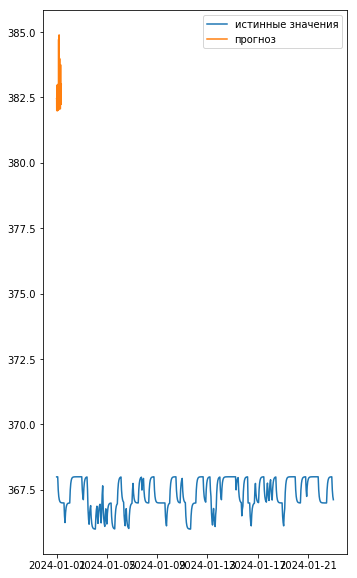

In [199]:
figure = pylab.subplot(1,2,2)
figure1 = pylab.plot(df2['flow1'], label = "истинные значения")
figure2 = pylab.plot(forecast_values1, label = "прогноз")
pylab.legend()